In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

In [2]:

oil_price_data = pd.read_csv(r'C:\Users\befekadum\Documents\10x acadamy\week10\Change_point_analysis-\data\featured_oil_price_data.csv')
oil_price_data

,Date,Price,Year,Month,day
0,1987-05-20,18.63,1987,5,20
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,22
3,1987-05-25,18.60,1987,5,25
4,1987-05-26,18.63,1987,5,26
...,...,...,...,...,...
9006,2022-11-08,96.85,2022,11,8
9007,2022-11-09,93.05,2022,11,9
9008,2022-11-10,94.25,2022,11,10
9009,2022-11-11,96.37,2022,11,11


In [3]:
from train_test_split import train_test_split
from Model_Selection import train_arima,train_garch

In [4]:
oil_price_data = oil_price_data.drop('Date',axis=1)

In [5]:
oil_price_data.dtypes

Price    float64
Year       int64
Month      int64
day        int64
dtype: object

data spliting get ready for model traianing 

In [6]:
train_data, test_data = train_test_split(oil_price_data)

Train-Test Split: 7208 training points, 1803 testing points.


In [7]:
arima_model = train_arima(train_data, (1, 1, 1))
garch_model = train_garch(train_data.diff().dropna(), (1, 1))

ARIMA model trained with order (1, 1, 1)
GARCH model trained with order (1, 1)


In [8]:
from model_eva import evaluate_arima_model

ARIMA Model Evaluation:
MSE: 616.72, MAE: 18.48


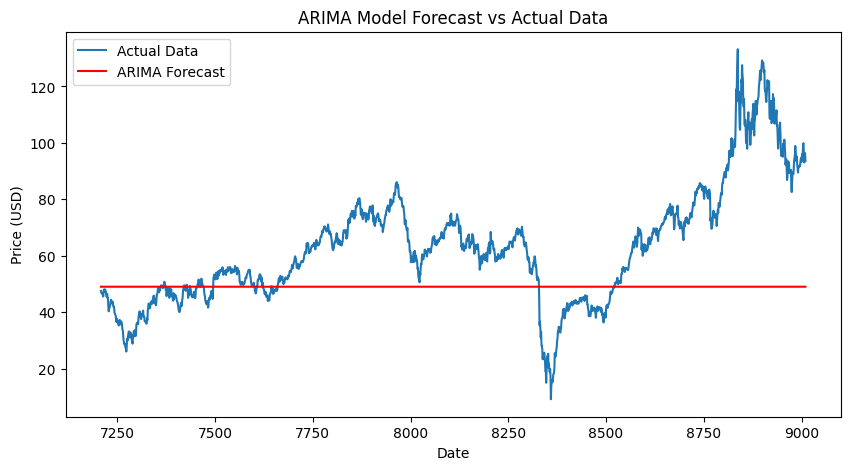

(np.float64(616.7243227547824), np.float64(18.484341205477442))

In [11]:
evaluate_arima_model(arima_model,test_data,train_data)